In [1]:
%matplotlib inline

#libraries for analysis
import pandas as pd 
import numpy as np 
from sklearn import svm

#libraries for ploting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.2)

# Pickle package
import pickle

-- Pandas


Pandas is a software library written for the Python programming  language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD  license.


-- Numpy


NumPy is a library for the Python programming language, adding  support for large, multi-dimensional arrays and matrices, along with a  large collection of high-level mathematical functions to operate on  these arrays. 


-- Scikit-learn


Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. Scikit-learn is a NumFOCUS fiscally sponsored project.


-- Matplotlib


Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.  As such, it offers a viable open source alternative to MATLAB.  Developers can also use matplotlib's APIs (Application Programming  Interfaces) to embed plots in GUI applications.


-- Seaborn


Seaborn is a Python data visualization library based on matplotlib.  It provides a high-level interface for drawing attractive and  informative statistical graphics. For a brief introduction to the ideas  behind the library, you can read the introductory notes or the paper.


-- Pickle


Python pickle module is used for serializing and de-serializing a Python object structure.  Any object in Python can be pickled so that it can be saved on disk.  What pickle does is that it “serializes” the object first before writing  it to file. Pickling is a way to convert a python object (list, dict,  etc).


Those are the most significant libraries that are must used in our project.

we first read the data and visualize 20 rows, and see the quantity in grams of each ingredient.

In [2]:
#read in muffin and cupcake in ingredient data 
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes.head()
#sns.pairplot(recipes)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [3]:
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


Flour, Sugar, egg and baking powder are dominant ingredients in these two delicious meal except that we can easily see that salt column doesn't contain much info here. Let's explore the 'Flour Sugar' columns and how they affect the resultant meal

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


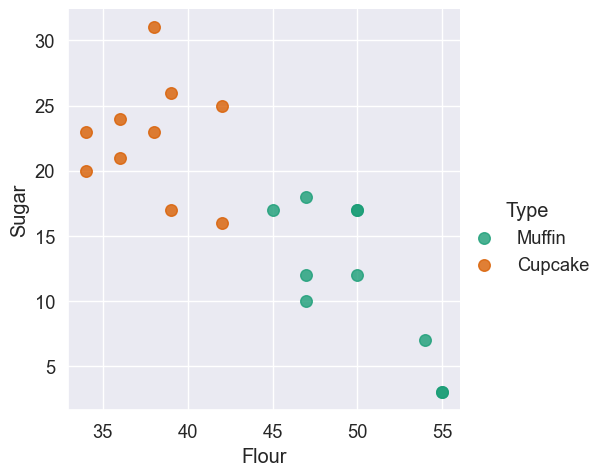

In [4]:
sns.lmplot(x ='Flour', y= 'Sugar', data=recipes, hue='Type',
           palette='Dark2',fit_reg=False,scatter_kws ={"s":70})
plt.show()

In [5]:
##format or preprocess our data
type_label=np.where(recipes['Type']== 'Muffin', 0, 1)
recipes_features=recipes.columns.values[1:].tolist()
recipes_features
ingredients=recipes[['Flour','Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


Modeling

we found out in the latest graph that we can have the Flour and Sugar columns from our data as the features of our modeling phase.


ingredients = recipes[['Flour','Sugar']]
We can use the Support Vector Machines in this simple case.


SVM 

Support Vector Machine or SVM is one of the most popular Supervised  Learning algorithms, which is used for Classification as well as  Regression problems. However, primarily, it is used for Classification  problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision  boundary that can segregate n-dimensional space into classes so that we  can easily put the new data point in the correct category in the future.  This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the  hyperplane. These extreme cases are called as support vectors, and hence  algorithm is termed as Support Vector Machine.


Example: SVM can be understood with the example that we  have used in the KNN classifier. Suppose we see a strange cat that also  has some features of dogs, so if we want a model that can accurately  identify whether it is a cat or dog, so such a model can be created by  using the SVM algorithm. We will first train our model with lots of  images of cats and dogs so that it can learn about different features of  cats and dogs, and then we test it with this strange creature. So as  support vector creates a decision boundary between these two data (cat  and dog) and choose extreme cases (support vectors), it will see the  extreme case of cat and dog. On the basis of the support vectors.


In [6]:
##fit the model
model=svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [7]:
## get a separating hyperlane
w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(30,60)
yy=a*xx-(model.intercept_[0])/w[1]


In [8]:
##plot the parallels to the sepaarating hyperlane that pass throogh the support vectors
b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


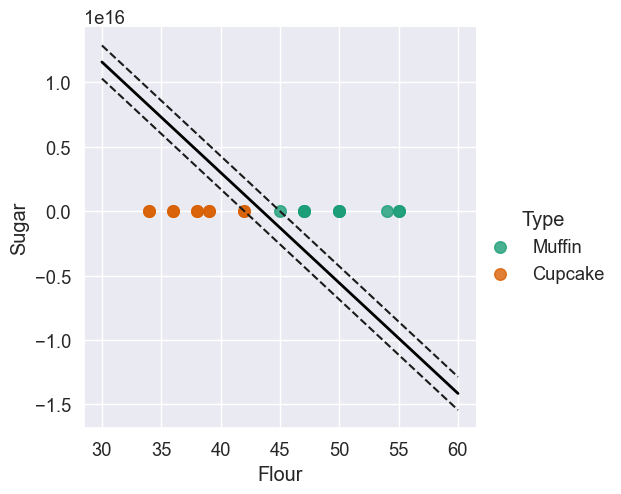

In [9]:
sns.lmplot(x ='Flour', y= 'Sugar', data=recipes, hue='Type',
           palette='Dark2',fit_reg=False,scatter_kws ={"s":70})
plt.plot(xx,yy, linewidth='2',color='Black')
plt.plot(xx, yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [10]:
##create a function to predict muffins or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([(flour, sugar)]))==0:
        print("you are looking for muffin recipe")
    else:
        print("you are looking for cupcake recipe")
##to predict if 50 is for flour and 20 is for sugar
muffin_or_cupcake(50,20)

you are looking for muffin recipe


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


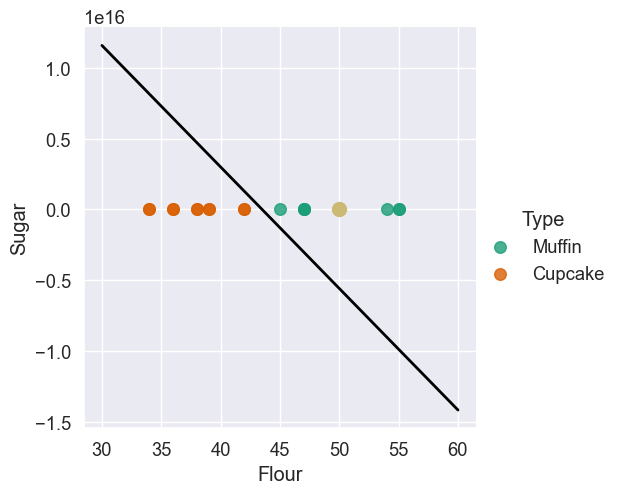

In [11]:
sns.lmplot(x ='Flour', y= 'Sugar', data=recipes, hue='Type',
           palette='Dark2',fit_reg=False,scatter_kws ={"s":70})
plt.plot(xx,yy, linewidth='2',color='Black')
plt.plot(50,20,'yo', markersize='10')

In [12]:
##create a function to predict muffins or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([(flour, sugar)]))==0:
        print("you are looking for muffin recipe")
    else:
        print("you are looking for cupcake recipe")
##to predict if 50 is for flour and 20 is for sugar
muffin_or_cupcake(40,60)

you are looking for cupcake recipe


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


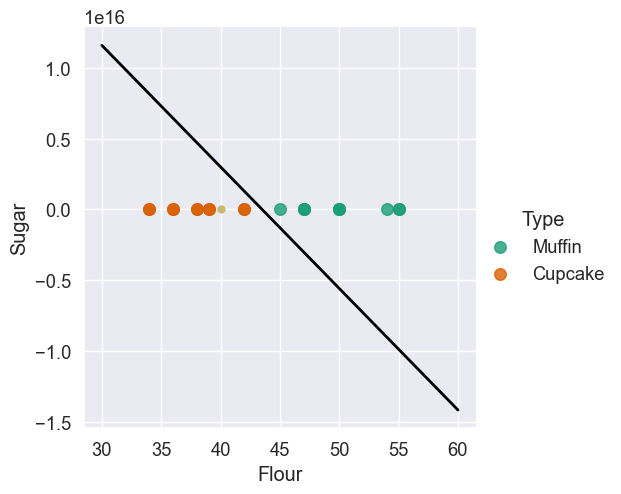

In [13]:
sns.lmplot(x ='Flour', y= 'Sugar', data=recipes, hue='Type',
           palette='Dark2',fit_reg=False,scatter_kws ={"s":70})
plt.plot(xx,yy, linewidth='2',color='Black')
plt.plot(40,60,'yo', markersize='5')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

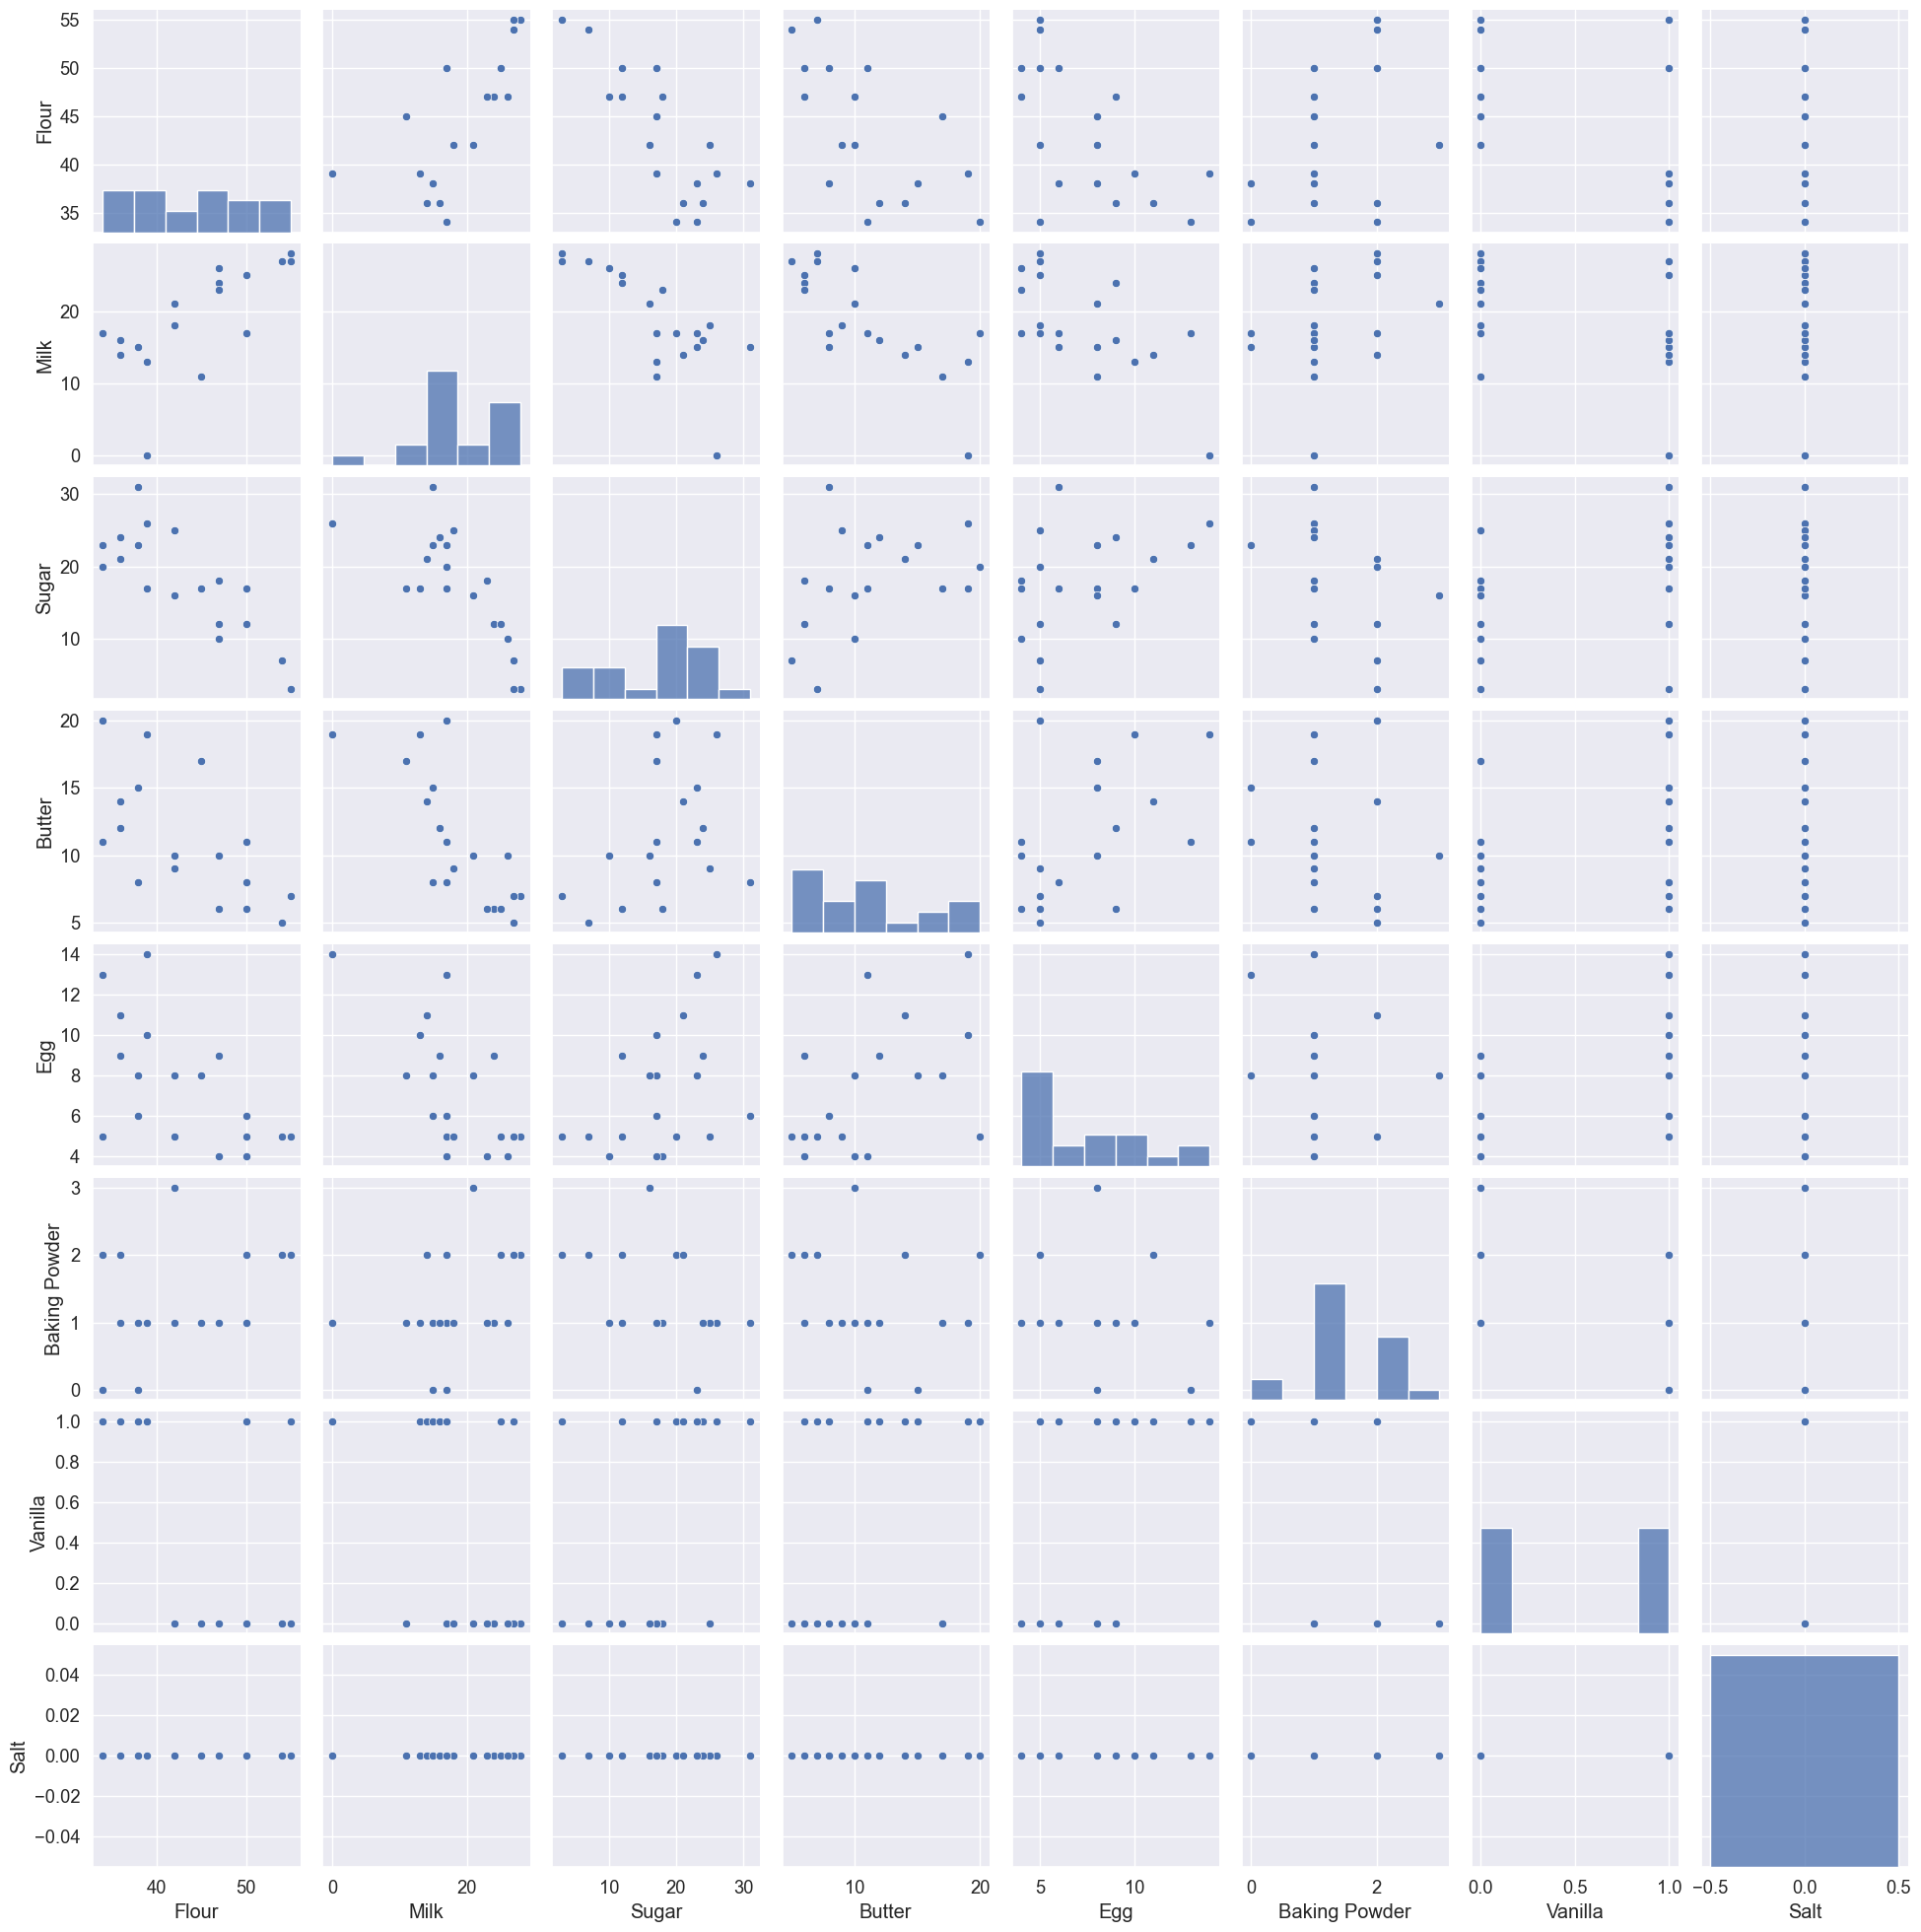

In [14]:
sns.pairplot(recipes)